<a href="https://colab.research.google.com/github/R151Arushi/EV-Adoption-Rates/blob/main/EV_Adoption_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
fuel_dict = {'Battery Electric': 'ZEV',
            'Diesel and Diesel Hybrid': 'Fuel',
            'Flex-Fuel': 'Fuel',
            'Gasoline': 'Fuel',
            'Hybrid Gasoline': 'Hybrid',
            'Hydrogen Fuel Cell': 'ZEV',
            'Natural Gas': 'Fuel',
            'Other': 'Fuel',
            'Plug-in Hybrid': 'Hybrid'}

#Select only the newest cars for the relevant year
def model(Dataset, Year):
  raw = pd.read_csv(Dataset)
  raw = raw[raw['Model Year'] == str(Year)]

  raw['Date']= pd.to_datetime(raw['Date'])
  raw['Fuel (Broad)'] = raw['Fuel'].map(fuel_dict)
  raw.rename({'Fuel': 'Fuel (Specific)'})

  return_df = pd.DataFrame(raw.groupby('Fuel (Broad)')['Vehicles'].sum()/raw['Vehicles'].sum() *100)
  return_df['Date'] = raw['Date'].min()
  return_df = return_df.reset_index()
  return_df.rename(columns = {'Fuel (Broad)': 'Fuel', 'Vehicles': 'Pct New Vehicles Registered'}, inplace = True)
  return return_df

# Calculate EV adoption rates for each year we have data:
summary_2019 = model('/content/drive/MyDrive/Tesla_EV_Project/EV_Data/2019.csv', 2019)
summary_2020 = model('/content/drive/MyDrive/Tesla_EV_Project/EV_Data/2020.csv', 2020)
summary_2021 = model('/content/drive/MyDrive/Tesla_EV_Project/EV_Data/2021.csv', 2021)
summary_2022 = model('/content/drive/MyDrive/Tesla_EV_Project/EV_Data/2022.csv', 2022)

<ipython-input-61-dce16d58c1e6>:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(Dataset)
<ipython-input-61-dce16d58c1e6>:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(Dataset)
<ipython-input-61-dce16d58c1e6>:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(Dataset)
<ipython-input-61-dce16d58c1e6>:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(Dataset)


In [63]:
df_final = pd.concat([summary_2019, summary_2020, summary_2021, summary_2022])
print(df_final.head(10))

     Fuel  Pct New Vehicles Registered       Date
0    Fuel                    96.084283 2018-10-01
1  Hybrid                     3.748978 2018-10-01
2     ZEV                     0.166739 2018-10-01
0    Fuel                    93.777791 2020-01-01
1  Hybrid                     5.144915 2020-01-01
2     ZEV                     1.077294 2020-01-01
0    Fuel                    85.069106 2021-01-01
1  Hybrid                    10.621342 2021-01-01
2     ZEV                     4.309552 2021-01-01
0    Fuel                    73.391843 2022-12-31


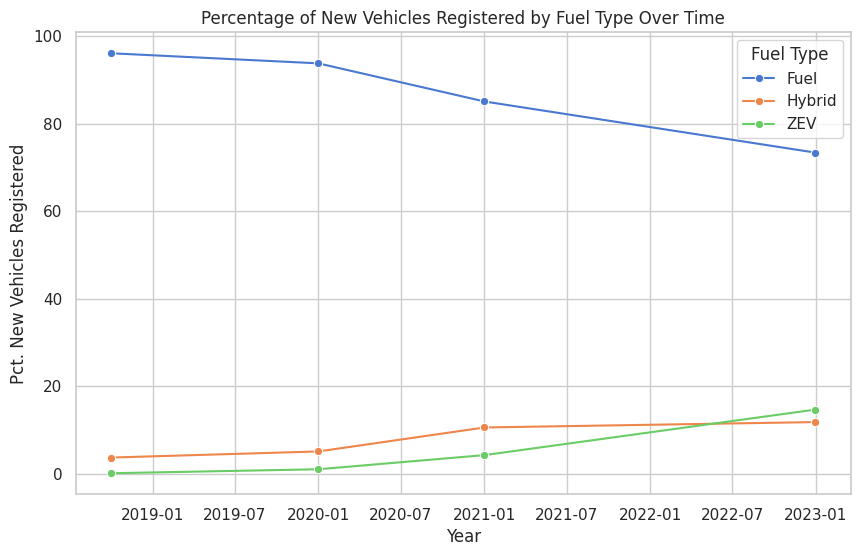

In [64]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_final, x='Date', y='Pct New Vehicles Registered', hue='Fuel', marker='o', palette='muted')
plt.title('Percentage of New Vehicles Registered by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('Pct. New Vehicles Registered')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()